This Notebook contains examples of plots of the solutions to Burger Equation and Wave Equation using Gaussian Process with various parameters such number of test point, noise and timestep

In [53]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [97]:
######################################## Parameters ########################################
## edit these parameters to choose the dataset to read

name = "Burger"
kernel = "arcsin"
test_point = 31
noise = 0.001
dt = 0.001

In [98]:
# define foldername 
foldername = f"{name}_{kernel}_"+f"{test_point}_test_points_"+f"{noise}_noise_"+f"{dt}_timestep"
folderpath = "../result/" + foldername

# check if foler exist
if not os.path.exists(folderpath):
    raise Exception(f"Folder {folderpath} does not exist") 

# read data from .npy files
u_mean = np.load(folderpath + "/u_mean.npy")
u_std = np.load(folderpath + "/u_std.npy")
x = np.load(folderpath + "/x.npy")
error = np.load(folderpath + "/error.npy")
u_true = np.load(folderpath + "/u_true.npy")


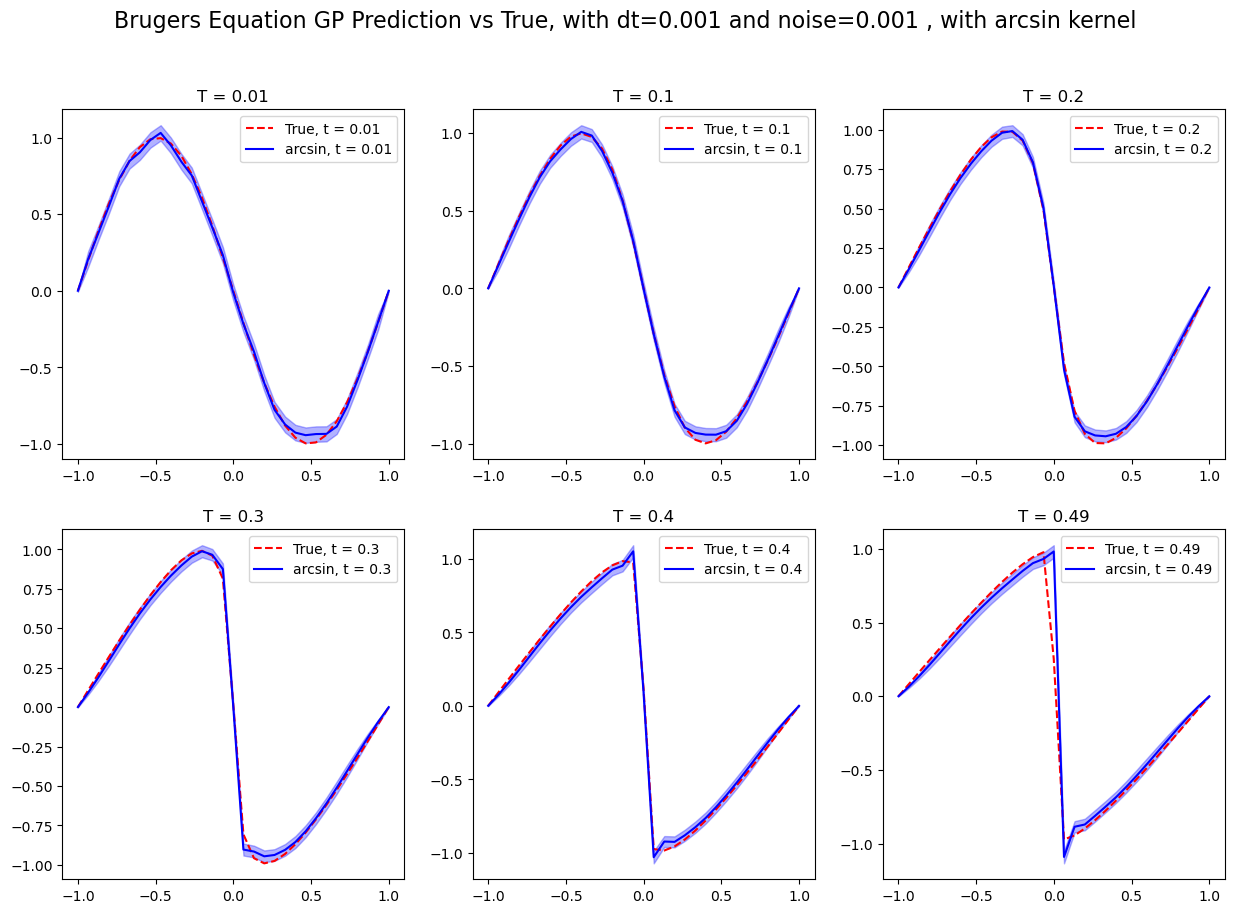

In [100]:
# subplot of 2 * 3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
t_list = [0.01, 0.1, 0.2, 0.3, 0.4, 0.49]
for i, t in enumerate(t_list):
    t_index = int(t/dt)
    # plot the true solution, with dashed line
    axs[i//3, i%3].plot(x, u_true[t_index], label="True, t = " + str(t), color = 'red', linestyle='dashed')
    axs[i//3, i%3].plot(x, u_mean[t_index], label=f"{kernel}, t = " + str(t), color = 'blue')
    # uncertainty
    axs[i//3, i%3].fill_between(x, u_mean[t_index]-u_std[t_index], u_mean[t_index]+u_std[t_index], alpha=0.3, color = 'blue')
    axs[i//3, i%3].set_title(f"T = {t}")
    axs[i//3, i%3].legend()
plt.suptitle(f"Brugers Equation GP Prediction vs True, with dt={dt} and noise={noise} , with {kernel} kernel", fontsize=16)
# plt.savefig("../result/uncertainty.png")
plt.savefig("../result/burger_gp.png")
plt.show()




## Compare two different kernels

In [117]:
########################### Parameters ################################
### This is an example of comparing two different kernels with the same parameterls

name1 = "Burger"
kernel1 = "arcsin"
test_point1 = 31
noise1 = 0.001
dt1 = 0.001

name2 = "Burger"
kernel2 = "RBF"
test_point2 = 31
noise2 = 0.001
dt2 = 0.001

# define folder names
foldername1 = f"{name1}_{kernel1}_{test_point1}_test_points_{noise1}_noise_{dt1}_timestep"
foldername2 = f"{name2}_{kernel2}_{test_point2}_test_points_{noise2}_noise_{dt2}_timestep"

# define paths to the folders
folderpath1 = "../result/" + foldername1
folderpath2 = "../result/" + foldername2

# check if folders exist
if not os.path.exists(folderpath1):
    raise Exception(f"Folder {folderpath1} does not exist")
if not os.path.exists(folderpath2):
    raise Exception(f"Folder {folderpath2} does not exist")

# read data from .npy files in both paths
u_mean1 = np.load(folderpath1 + "/u_mean.npy")
u_std1 = np.load(folderpath1 + "/u_std.npy")
x1 = np.load(folderpath1 + "/x.npy")
error1 = np.load(folderpath1 + "/error.npy")
u_true1 = np.load(folderpath1 + "/u_true.npy")

u_mean2 = np.load(folderpath2 + "/u_mean.npy")
u_std2 = np.load(folderpath2 + "/u_std.npy")
x2 = np.load(folderpath2 + "/x.npy")
error2 = np.load(folderpath2 + "/error.npy")
u_true2 = np.load(folderpath2 + "/u_true.npy")


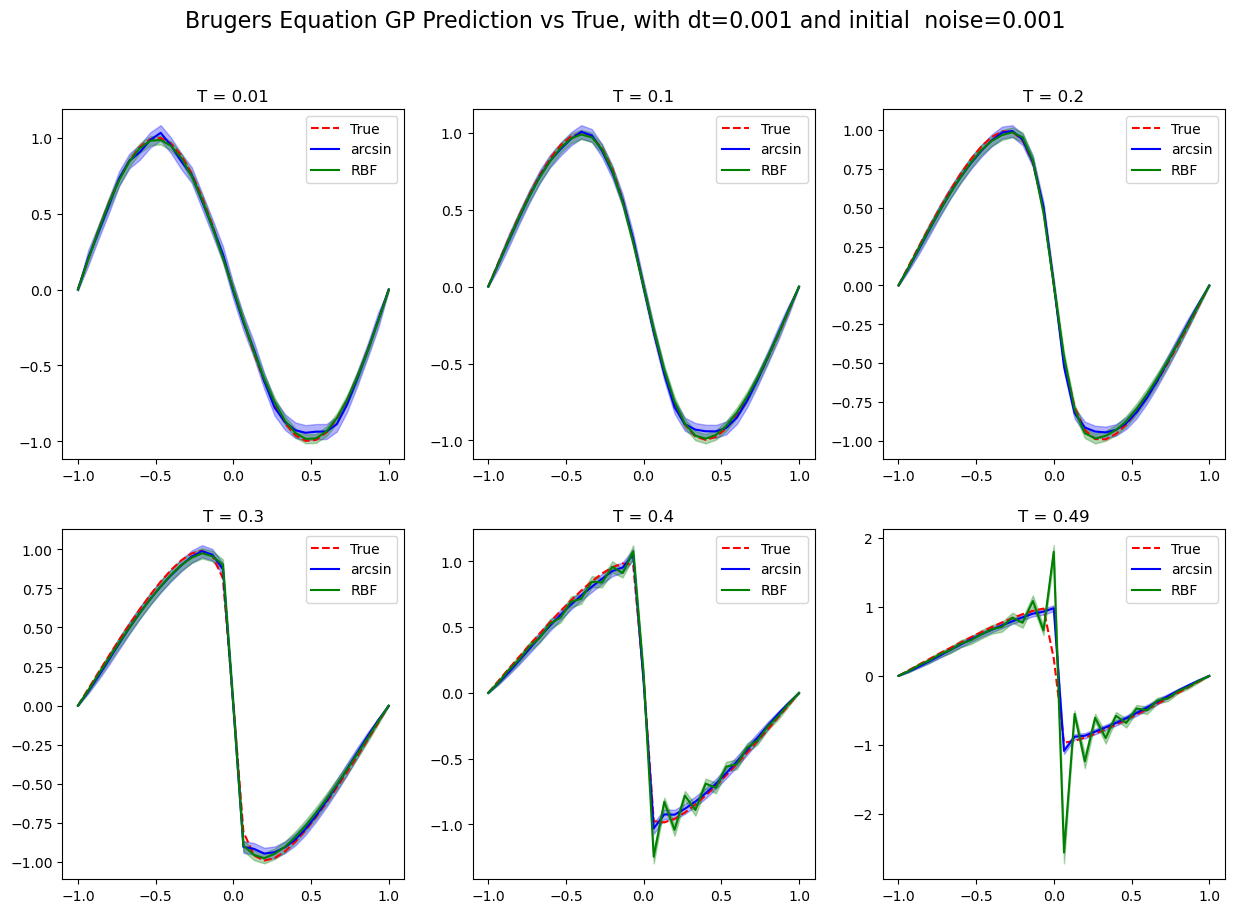

In [125]:
# plot the behavior over time for each kernel

# subplot of 2 * 3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
t_list = [0.01, 0.1, 0.2, 0.3, 0.4, 0.49]
for i, t in enumerate(t_list):
    t_index = int(t/dt1)
    # plot the true solution, with dashed line
    axs[i//3, i%3].plot(x2, u_true2[t_index], label="True", color = 'red', linestyle='dashed')
    axs[i//3, i%3].plot(x1, u_mean1[t_index], label=f"{kernel1}", color = 'blue')
    axs[i//3, i%3].plot(x1, u_mean2[t_index], label=f"{kernel2}", color = 'green')
    # uncertainty
    axs[i//3, i%3].fill_between(x, u_mean1[t_index]-u_std1[t_index], u_mean1[t_index]+u_std1[t_index], alpha=0.3, color = 'blue')
    axs[i//3, i%3].fill_between(x, u_mean2[t_index]-u_std2[t_index], u_mean2[t_index]+u_std2[t_index], alpha=0.3, color = 'green')
    axs[i//3, i%3].set_title(f"T = {t}")
    axs[i//3, i%3].legend()
plt.suptitle(f"Brugers Equation GP Prediction vs True, with dt={dt1} and initial  noise={noise1}", fontsize=16)
plt.savefig("../result/kernel_comparison.png")
plt.show()

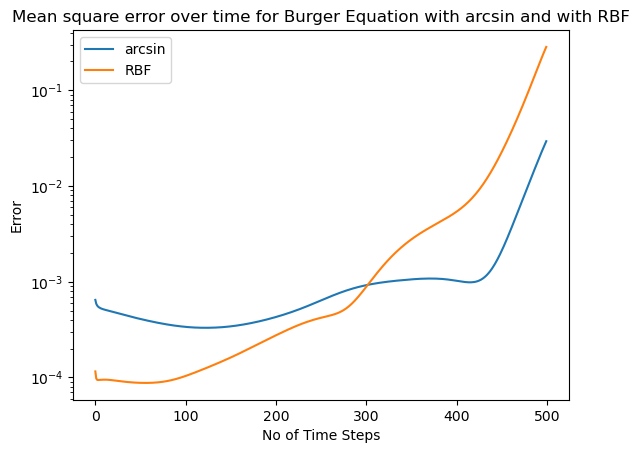

In [124]:
# plot the error over time for each kernel
plt.plot(np.mean(error1[:500], axis = 1), label=f"{kernel1}")
plt.plot(np.mean(error2[:500], axis = 1), label=f"{kernel2}")
plt.xlabel("No of Time Steps")
plt.ylabel("Error")

plt.title(f"Mean square error over time for {name1} Equation with {kernel1} and with {kernel2}")
plt.legend()
plt.yscale("log")
plt.savefig("../result/kernel_comparison_error.png")
plt.show()


## compare time-step dt

In [130]:
name1 = "Burger"
kernel1 = "arcsin"
test_point1 = 31
noise1 = 0.001
dt1 = 0.01

name2 = "Burger"
kernel2 = "arcsin"
test_point2 = 31
noise2 = 0.001
dt2 = 0.001

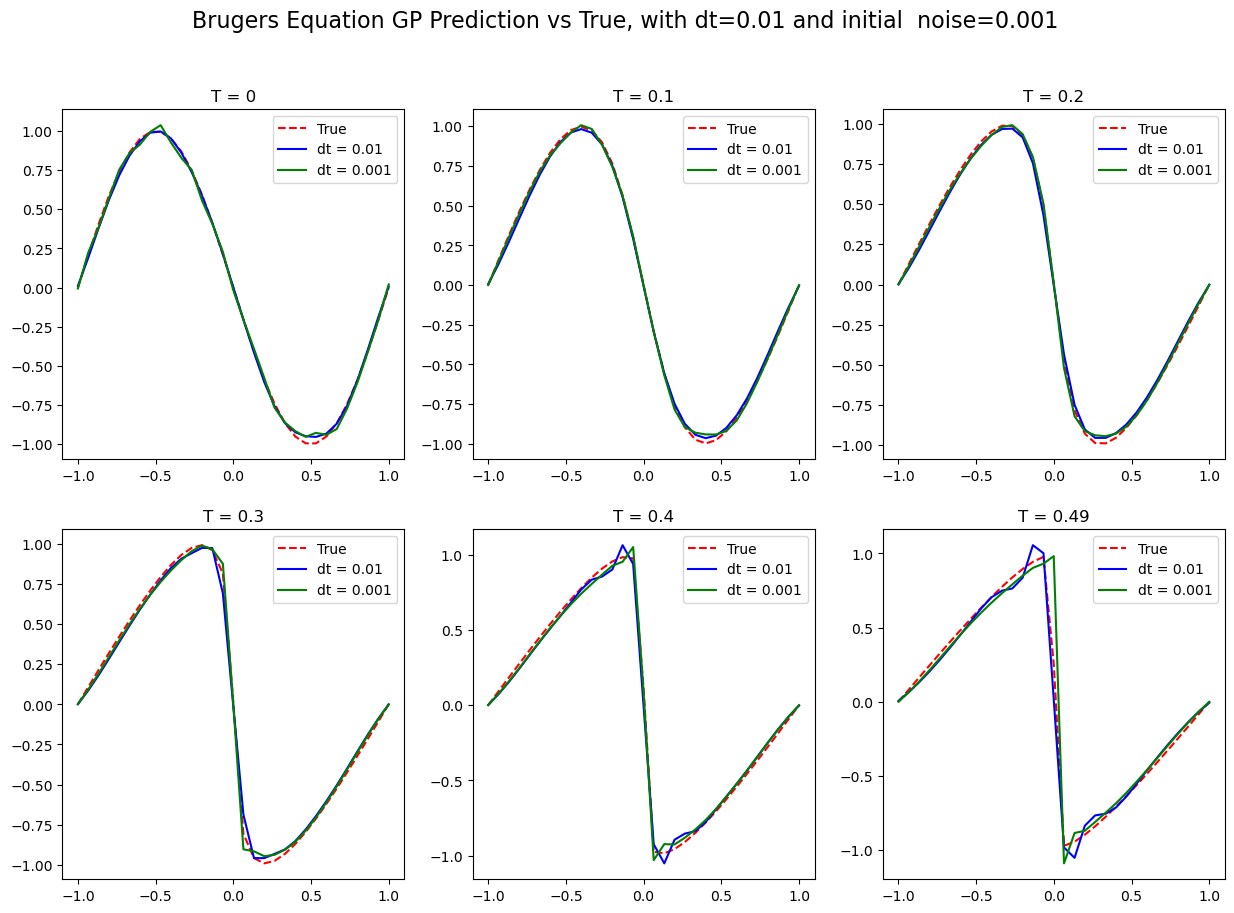

In [132]:
# define folder names
foldername1 = f"{name1}_{kernel1}_{test_point1}_test_points_{noise1}_noise_{dt1}_timestep"
foldername2 = f"{name2}_{kernel2}_{test_point2}_test_points_{noise2}_noise_{dt2}_timestep"

# define paths to the folders
folderpath1 = "../result/" + foldername1
folderpath2 = "../result/" + foldername2

# check if folders exist
if not os.path.exists(folderpath1):
    raise Exception(f"Folder {folderpath1} does not exist")
if not os.path.exists(folderpath2):
    raise Exception(f"Folder {folderpath2} does not exist")

# read data from .npy files in both paths
u_mean1 = np.load(folderpath1 + "/u_mean.npy")
u_std1 = np.load(folderpath1 + "/u_std.npy")
x1 = np.load(folderpath1 + "/x.npy")
error1 = np.load(folderpath1 + "/error.npy")
u_true1 =  np.load(folderpath1 + "/u_true.npy")

u_mean2 = np.load(folderpath2 + "/u_mean.npy")
u_std2 = np.load(folderpath2 + "/u_std.npy")
x2 = np.load(folderpath2 + "/x.npy")
error2 = np.load(folderpath2 + "/error.npy")
u_true2 = np.load(folderpath2 + "/u_true.npy")

# plot the behavior over time for each kernel

# subplot of 2 * 3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
t_list = [0, 0.1, 0.2, 0.3, 0.4, 0.49]
for i, t in enumerate(t_list):
    t_index1 = int(t/dt1)
    t_index2 = int(t/dt2)
    # plot the true solution, with dashed line
    axs[i//3, i%3].plot(x2, u_true2[t_index2], label="True", color = 'red', linestyle='dashed')
    axs[i//3, i%3].plot(x1, u_mean1[t_index1], label=f"dt = {dt1}", color = 'blue')
    axs[i//3, i%3].plot(x2, u_mean2[t_index2], label=f"dt = {dt2}", color = 'green')
    # uncertainty
    # axs[i//3, i%3].fill_between(x, u_mean1[t_index]-u_std1[t_index], u_mean1[t_index]+u_std1[t_index], alpha=0.3, color = 'blue')
    # axs[i//3, i%3].fill_between(x, u_mean2[t_index]-u_std2[t_index], u_mean2[t_index]+u_std2[t_index], alpha=0.3, color = 'green')
    axs[i//3, i%3].set_title(f"T = {t}")
    axs[i//3, i%3].legend()
plt.suptitle(f"Brugers Equation GP Prediction vs True, with dt={dt1} and initial  noise={noise1}", fontsize=16)
# plt.savefig("../result/kernel_comparison.png")
plt.show()
    

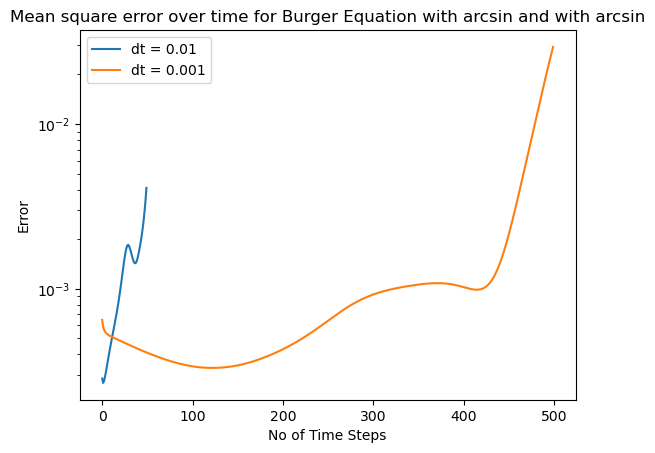

In [135]:
# plot the error over time for each kernel
plt.plot(np.mean(error1[:50], axis = 1), label=f"dt = {dt1}")
plt.plot(np.mean(error2[:500], axis = 1), label=f"dt = {dt2}")
plt.xlabel("No of Time Steps")
plt.ylabel("Error")

plt.title(f"Mean square error over time for {name1} Equation with {kernel1} and with {kernel2}")
plt.legend()
plt.yscale("log")
plt.savefig("../result/kernel_comparison_error.png")
plt.show()


Plot the wave equation solution

[0.         0.03333333 0.06666667 0.1        0.13333333 0.16666667
 0.2        0.23333333 0.26666667 0.3        0.33333333 0.36666667
 0.4        0.43333333 0.46666667 0.5        0.53333333 0.56666667
 0.6        0.63333333 0.66666667 0.7        0.73333333 0.76666667
 0.8        0.83333333 0.86666667 0.9        0.93333333 0.96666667
 1.         0.         0.03333333 0.06666667 0.1        0.13333333
 0.16666667 0.2        0.23333333 0.26666667 0.3        0.33333333
 0.36666667 0.4        0.43333333 0.46666667 0.5        0.53333333
 0.56666667 0.6        0.63333333 0.66666667 0.7        0.73333333
 0.76666667 0.8        0.83333333 0.86666667 0.9        0.93333333
 0.96666667 1.        ]


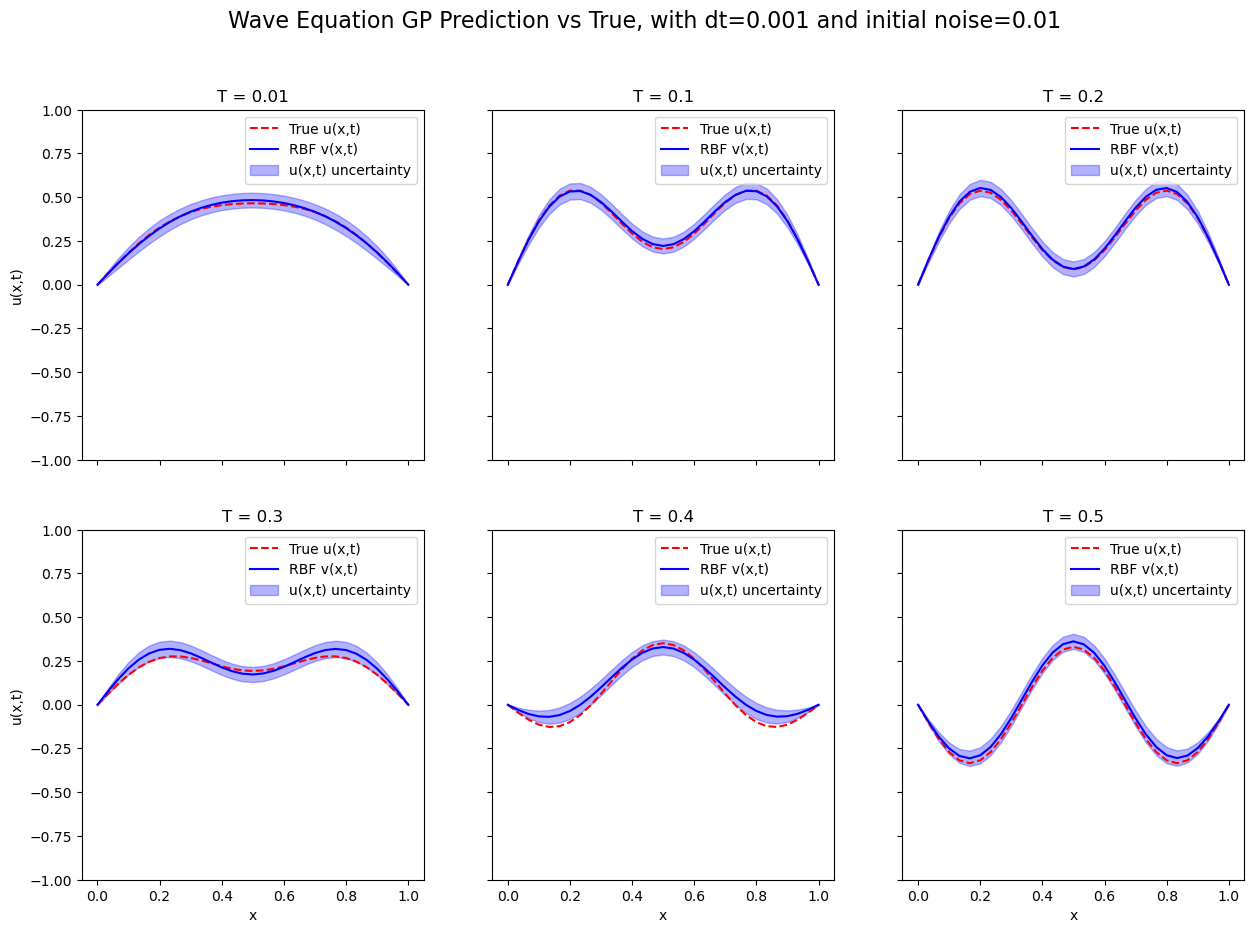

In [91]:
name_wave = "Wave"
kernel_wave = "RBF"
test_point_wave = 31
noise_wave = 0.01
dt_wave = 0.001

# define foldername
foldername_wave = f"{name_wave}_{kernel_wave}_{test_point_wave}_test_points_{noise_wave}_noise_{dt_wave}_timestep"
folderpath_wave = "../result/" + foldername_wave

# check if folder exists
if not os.path.exists(folderpath_wave):
    raise Exception(f"Folder {folderpath_wave} does not exist")

# read data from .npy files
u_mean_wave = np.load(folderpath_wave + "/u_mean.npy")
u_std_wave = np.load(folderpath_wave + "/u_std.npy")
v_mean_wave = np.load(folderpath_wave + "/v_mean.npy")
v_std_wave = np.load(folderpath_wave + "/v_std.npy")
x_wave = np.load(folderpath_wave + "/x.npy")
# error_wave = np.load(folderpath_wave + "/error.npy")
u_true_wave = np.load(folderpath_wave + "/u_true.npy")
v_true_wave = np.load(folderpath_wave + "/v_true.npy")
print (x_wave)
# plot the behavior over time for each kernel

# subplot of 2 * 3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

t_list = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]


# plot u
for i, t in enumerate(t_list):
    t_index = int(t/dt_wave)
    # plot the true solution, with dashed line
    axs[i//3, i%3].plot(x_wave[:test_point_wave], u_true_wave[t_index], label="True u(x,t)", color = 'red', linestyle='dashed')
    axs[i//3, i%3].plot(x_wave[:test_point_wave], u_mean_wave[t_index], label=f"{kernel_wave} v(x,t)", color = 'blue')

    # plot the true solution of v, with dashed line
    # axs[i//3, i%3].plot(x_wave[:test_point_wave], v_true_wave[t_index], label="True v(x,t)", color = 'orange', linestyle='dashed')
    # axs[i//3, i%3].plot(x_wave[:test_point_wave], v_mean_wave[t_index], label=f"{kernel_wave} v(x,t)", color = 'green')
    # uncertainty
    axs[i//3, i%3].fill_between(x_wave[:test_point_wave],u_mean_wave[t_index]-u_std_wave[t_index] , u_mean_wave[t_index]+u_std_wave[t_index], alpha=0.3, color = 'blue', label="u(x,t) uncertainty")
    axs[i//3, i%3].set_title(f"T = {t}")
    axs[i//3, i%3].legend()

    # set limit
    axs[i//3, i%3].set_ylim(-1, 1)

# set x and y label at outermost plot
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='u(x,t)')
for ax in axs.flat:
    ax.label_outer()

plt.suptitle(f"Wave Equation GP Prediction vs True, with dt={dt_wave} and initial noise={noise_wave}", fontsize=16)
# plt.savefig("../result/wave_gp.png")
plt.show()



## plot the error of the solution at large T

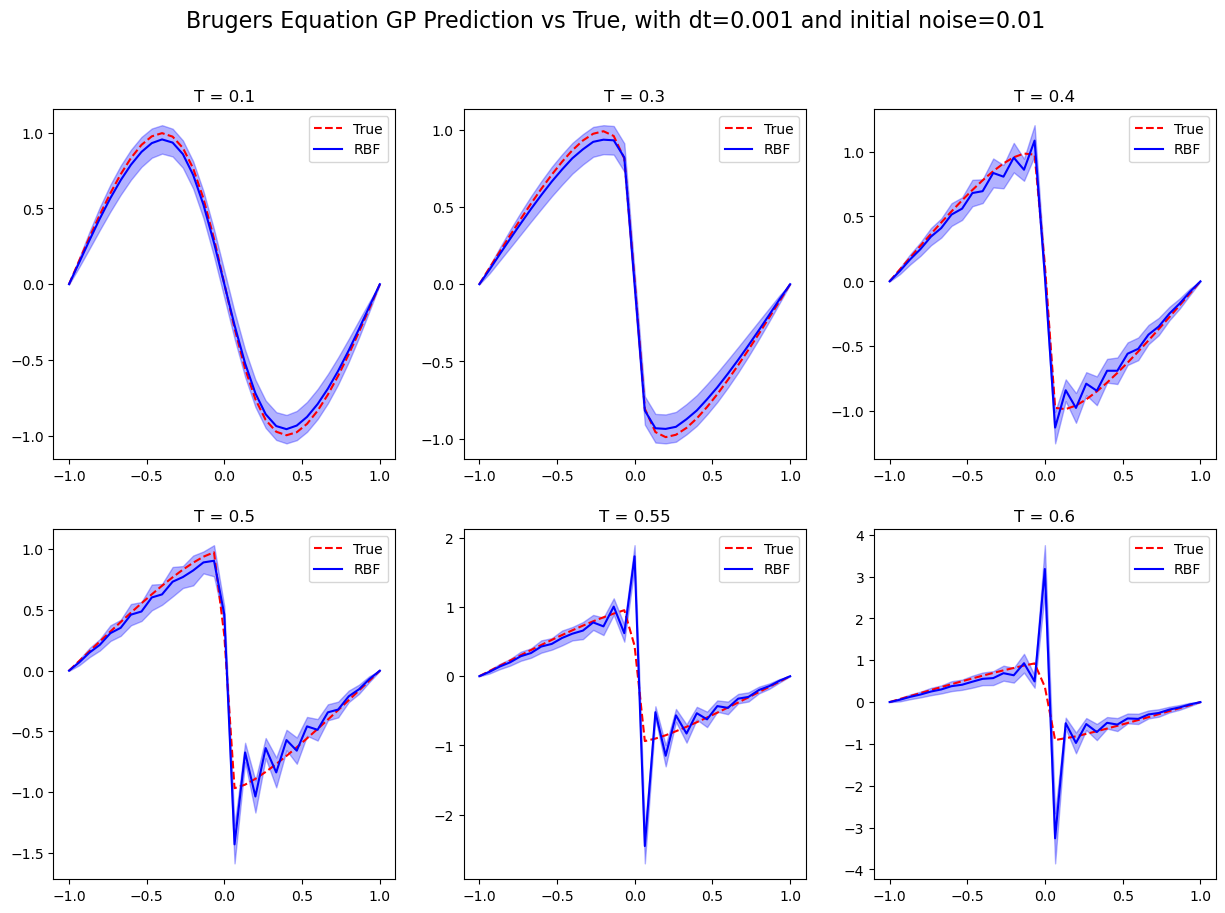

In [129]:
name_error = "Burger"
kernel_error = "RBF"
test_point_error = 31
noise_error = 0.01
dt_error = 0.001

# define foldername
foldername_error = f"{name_error}_{kernel_error}_{test_point_error}_test_points_{noise_error}_noise_{dt_error}_timestep"
folderpath_error = "../result/" + foldername_error

# check if folder exists
if not os.path.exists(folderpath_error):
    raise Exception(f"Folder {folderpath_error} does not exist")

# read data from .npy files
u_mean_error = np.load(folderpath_error + "/u_mean.npy")
u_std_error = np.load(folderpath_error + "/u_std.npy")
x_error = np.load(folderpath_error + "/x.npy")
error_error = np.load(folderpath_error + "/error.npy")
u_true_error = np.load(folderpath_error + "/u_true.npy")

# plot the behavior over time for each kernel

# subplot of 2 * 3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
t_list = [0.1, 0.3, 0.4, 0.5, 0.55, 0.6]

# plot u
for i, t in enumerate(t_list):
    t_index = int(t/dt_error)
    # plot the true solution, with dashed line
    axs[i//3, i%3].plot(x_error, u_true_error[t_index], label="True", color = 'red', linestyle='dashed')
    axs[i//3, i%3].plot(x_error, u_mean_error[t_index], label=f"{kernel_error}", color = 'blue')
    # uncertainty
    axs[i//3, i%3].fill_between(x_error, u_mean_error[t_index]-u_std_error[t_index], u_mean_error[t_index]+u_std_error[t_index], alpha=0.3, color = 'blue')
    axs[i//3, i%3].set_title(f"T = {t}")
    axs[i//3, i%3].legend()
plt.suptitle(f"Brugers Equation GP Prediction vs True, with dt={dt_error} and initial noise={noise_error}", fontsize=16)
# plt.savefig("../result/time_step.png")
plt.show()

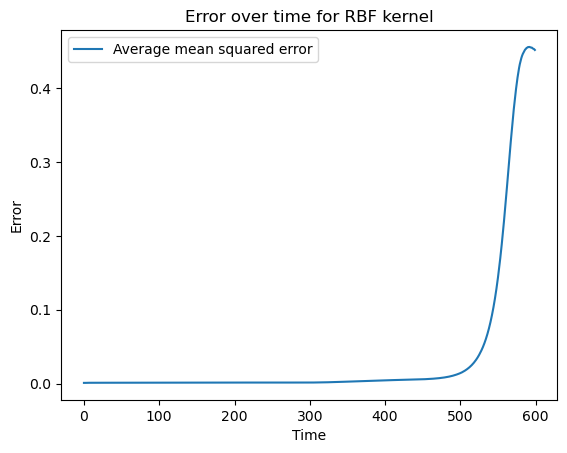

In [38]:
# plot error over time
plt.plot(np.mean(error_error[0:600], axis=1), label = "Average mean squared error")
plt.xlabel("Time")
plt.ylabel("Error")
plt.title(f"Error over time for {kernel_error} kernel")
plt.legend()
# plt.savefig("../result/error_time_step.png")
plt.show()